In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
from sklearn import preprocessing
from mpl_toolkits import mplot3d


In [41]:
cd D:\FML Project

D:\FML Project


In [42]:
df = pd.read_csv('crab.txt')

## Splitting the test, training and class data

In [43]:
training = df.head(140)
test = df[140:200]
target = test["Species"]
training.drop('Male',axis =1, inplace = True)
test.drop('Male',axis = 1, inplace = True)
class1cond = training["Species"] == 0
class2cond = training["Species"] == 1
class1 = training[class1cond]
class2 = training[class2cond]
class1.drop('Species', axis = 1 , inplace = True)
class2.drop('Species',axis = 1, inplace = True)
test_true = test
test.drop('Species',axis = 1, inplace = True)
print(class1.columns)
print(class2.columns)
print(test_true.columns)
print(training.corr())

Index(['FrontalLip', 'RearWidth', 'Length', 'Width', 'Depth', 'Female'], dtype='object')
Index(['FrontalLip', 'RearWidth', 'Length', 'Width', 'Depth', 'Female'], dtype='object')
Index(['FrontalLip', 'RearWidth', 'Length', 'Width', 'Depth', 'Female'], dtype='object')
             Species  FrontalLip  RearWidth    Length     Width     Depth  \
Species     1.000000   -0.452851  -0.349011 -0.293978 -0.220362 -0.434469   
FrontalLip -0.452851    1.000000   0.916180  0.977073  0.961632  0.987979   
RearWidth  -0.349011    0.916180   1.000000  0.894173  0.899375  0.897597   
Length     -0.293978    0.977073   0.894173  1.000000  0.994630  0.982178   
Width      -0.220362    0.961632   0.899375  0.994630  1.000000  0.965610   
Depth      -0.434469    0.987979   0.897597  0.982178  0.965610  1.000000   
Female     -0.000817   -0.029825   0.290706 -0.100774 -0.068113 -0.078179   

              Female  
Species    -0.000817  
FrontalLip -0.029825  
RearWidth   0.290706  
Length     -0.100774  
W

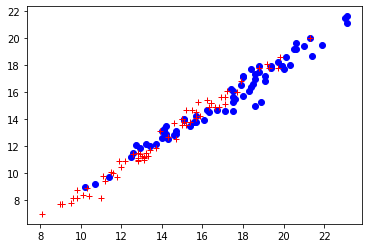

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure()

x = class1["FrontalLip"]
y = class1["Depth"]
plt.plot(x,y,"bo")
x = class2["FrontalLip"]
y = class2["Depth"]
plt.plot(x,y,"r+")

## Calculating the mean and variance of training set

In [45]:
mu1 = np.mean(class1, axis = 0)

cov1 = np.cov(class1.T)

mu2 = np.mean(class2, axis=0)

cov2 = np.cov(class2.T)

pC1 = class1.shape[0]/(class1.shape[0] + class2.shape[0])
print('Probability of  Class 1: \n',pC1)

pC2 = class2.shape[0]/(class1.shape[0] + class2.shape[0])
print('Probability of Class 2: ',pC2)

Probability of  Class 1: 
 0.5142857142857142
Probability of Class 2:  0.4857142857142857


## Probability density function

In [46]:
from scipy.stats import multivariate_normal

#probability density function (pdf)
y1 = multivariate_normal.pdf(test, mean=mu1, cov=cov1) #P(x|C1)
y2 = multivariate_normal.pdf(test, mean=mu2, cov=cov2) #P(x|C2)

## Posterior Distributions

In [47]:
# Look at the posterior distributions
pos1 = (y1*pC1)/ (y1*pC1 + y2*pC2)
pos2 = (y2*pC2)/(y1*pC1 + y2*pC2)
pos1<pos2

array([False, False,  True,  True,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True,  True,  True,  True, False])

## Predicting the species type based on posterior distributions

In [48]:
predicted = []
for number in range(60):
    if(pos1[number]>pos2[number]):
        predicted.append(0)
    else:
        predicted.append(1)
#target = target.to_numpy()

## Calculating the accuracy of the model

In [49]:
test1 = df[140:200]
target = test1["Species"]
t=np.array(target)
accuracy = []
accuracy = t == predicted
count = 0
for i in range(60):
    if accuracy[i] == 1:
        count +=1
accuracy = (count/60)*100
print("Accuracy is ",accuracy,"%")

Accuracy is  100.0 %


## Problem Encountered and its Solution
Recall that while doing the probablistic generative classifiers, we assumed that our data was independent and identically distributed. Although, identically distributed, our data was not independent of each other. For example, the column Male and Female were not independent of each other. Thus our assumption that the data was independent of each other was wrong. Thus the inverse of our covariance matrix could not exist as the covariance matrix becomes a singular matrix since the column Male and Female both of them were there. The solution to this problem is simply dropping any one of the columns either male or female so that our data becomes independent of each other. 

## Confusion Matrix

In [50]:
#Confusion Matrix for all the parameters
#from sklearn.metrics import confusion_matrix
#confusion_matrix(t, predicted, labels=[0, 1])
def getConfusionMatrix(t,predicted):
    cm = [ [ 0 for i in range(2) ] for j in range(2) ] 
    c1 = 0
    c2 = 0
    c3 = 0
    c4 = 0
    for i in range(len(t)):
        #print(t[i],"   ",predicted[i])
        #print(t[i] == 0 and predicted[i] ==0)
        if t[i] == 0 and predicted[i] == 0:
            c1+=1
        elif t[i] == 0 and predicted[i] == 1:
            c2+=1
        elif t[i] == 1 and predicted[i] ==0:
            c3+=1
        elif t[i] == 1 and predicted[i] == 1:
            c4+=1
    cm[0][0] = c1
    cm[0][1] = c2
    cm[1][0] = c3
    cm[1][1] = c4
    return cm

In [13]:
confusion_matrix = getConfusionMatrix(t,predicted)
print(confusion_matrix)

[[28, 0], [0, 32]]


## Confusion Matrix for test data: Probabilistic Generative Classifiers

|actual/predict|   Species 0  |    Species 1|
|--------------|--------------|-------------|
| Species 0    |      28      |       0     |
| Species 1    |       0      |       32    |

## KNN Algorithm for test data

In [51]:
import math

training_knn = df.head(140)
test_knn = df[140:200]
test_knn.drop('Male',axis = 1, inplace = True)
training_knn.drop('Male',axis = 1, inplace = True)
#normalized_training_knn = preprocessing.normalize(training_knn)
#normalized_test_knn = preprocessing.normalize(test_knn)
def euclideanDistance(instance1, instance2, length):
    dist= 0
    for x in range(0,length):
        dist += pow((instance1[x]-instance2[x]),2)
    return math.sqrt(dist)

In [52]:
data1 = training_knn.to_numpy()
data2 = test_knn.to_numpy()
print(data1[0].shape)
print(data2[0].shape)
euclideanDistance(data1[0],data2[0],7)
#d = euclideanDistance(data1.head,data2[0],7)

(7,)
(7,)


17.30837947353824

In [53]:
import operator
def getNeighbors(trainingSet,testInstance,k):
    distances = []
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance,trainingSet[x],7)
        distances.append((trainingSet[x],dist))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [55]:
t2 = test_knn.to_numpy()
t1 = training_knn.to_numpy()
neighbors = getNeighbors(t1,t2[0],5)
print(neighbors)

[array([ 0. , 16.1, 13.7, 31.4, 36.1, 13.9,  1. ]), array([ 0. , 15.7, 13.6, 31. , 34.8, 13.8,  1. ]), array([ 0. , 15.6, 14.1, 31. , 34.5, 13.8,  1. ]), array([ 0. , 16.7, 14.3, 32.3, 37. , 14.7,  1. ]), array([ 1. , 15. , 13.8, 31.7, 36.9, 14. ,  1. ])]


In [56]:
import operator
def getResponse(neighbors):
    classVotes = []
    classVotes.append(0)
    classVotes.append(0)
    for x in range(len(neighbors)):
        response = neighbors[x][0]
        if response == 0:
            classVotes[0] = classVotes[0]+1
        else:
            classVotes[1] = classVotes[1]+1
    return classVotes

In [57]:
def getAccuracy(testSet,predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][0] == predictions[x]:
            correct+=1
    return(correct/float(len(testSet)))*100.0

In [58]:
testSet = test_knn.head(20)
t1 = testSet.to_numpy()
predictions = []
for x in range(20):
    predictions.append(0.0)
accuracy = getAccuracy(t1,predictions)

91.66666666666666
88.33333333333333
86.66666666666667
86.66666666666667
86.66666666666667
81.66666666666667
78.33333333333333
81.66666666666667
81.66666666666667
80.0
78.33333333333333
76.66666666666667
76.66666666666667
80.0
73.33333333333333
73.33333333333333
75.0
75.0
73.33333333333333
68.33333333333333


Text(0.5, 1.0, 'Accuracy Vs K')

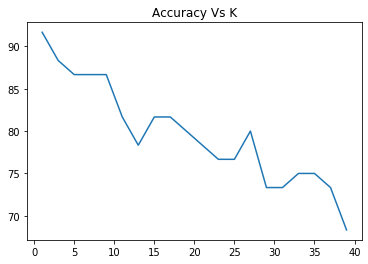

In [61]:
test_knn1 =  test_knn.to_numpy()
training_knn1 = training_knn.to_numpy()
graphk = []
graphaccuracy = []
for k in range(1,40,2):
    prediction = []
    for x in range(len(test_knn1)):
        classVotes = []
        neighbors  = getNeighbors(training_knn1,test_knn1[x],k)
        classVotes = getResponse(neighbors)
        if classVotes[0]>classVotes[1]:
            prediction.append(0)
        else:
            prediction.append(1)
    accuracy = getAccuracy(test_knn1,prediction)
    print(accuracy)
    graphk.append(k)
    graphaccuracy.append(accuracy)
plt.plot(graphk, graphaccuracy)
plt.title("Accuracy Vs K")

## For optimum value of k

In [20]:
prediction = []
classVotes = []
for x in range(len(test_knn1)):
    neighbors  = getNeighbors(training_knn1,test_knn1[x],1)
    classVotes = getResponse(neighbors)
    if classVotes[0]>classVotes[1]:
        prediction.append(0)
    else:
        prediction.append(1)
confusion_matrix = getConfusionMatrix(t,prediction)
print(confusion_matrix)

[[27, 1], [4, 28]]


# Confusion Matrix for K-NN where K=1
|actual/predict|   Species 0  |    Species 1|
|--------------|--------------|-------------|
| Species 0    |      27      |       1     |
| Species 1    |      04      |       28    |

## KNN for training data without considering the distance of the point to itself

In [21]:
import sys
def getNeighborsTraining(trainingSet,testInstance,k):
    distances = []
    for x in range(len(trainingSet)):
        comparison = trainingSet[x] == testInstance
        equal_arrays = comparison.all()
        if equal_arrays:
            dist = sys.maxsize
        else:
            dist = euclideanDistance(testInstance,trainingSet[x],7)
        distances.append((trainingSet[x],dist))
    distances.sort(key = operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [22]:
print(sys.maxsize)

9223372036854775807


95.71428571428572
92.14285714285714
91.42857142857143
89.28571428571429
84.28571428571429
85.0
83.57142857142857
82.14285714285714
80.71428571428572
79.28571428571428
78.57142857142857
76.42857142857142
74.28571428571429
72.14285714285714
70.0
67.14285714285714
66.42857142857143
60.0
62.142857142857146
64.28571428571429
63.57142857142857
63.57142857142857
62.142857142857146
59.285714285714285
56.42857142857143
55.00000000000001
51.42857142857142
60.0
60.71428571428571
61.42857142857143
59.285714285714285
57.85714285714286
56.42857142857143
56.42857142857143
57.14285714285714
57.14285714285714
56.42857142857143
57.14285714285714
56.42857142857143
60.0
60.71428571428571
60.0
60.0
60.0
58.57142857142858
60.71428571428571
58.57142857142858
58.57142857142858
59.285714285714285
59.285714285714285


Text(0.5, 1.0, 'Accuracy Vs K')

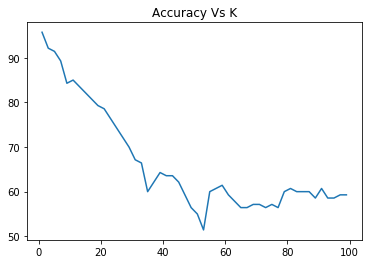

In [23]:
test_knn1 =  test_knn.to_numpy()
training_knn1 = training_knn.to_numpy()
graphk = []
graphaccuracy = []
for k in range(1,100,2):
    prediction = []
    for x in range(len(training_knn1)):
        classVotes = []
        neighbors  = getNeighborsTraining(training_knn1,training_knn1[x],k)
        classVotes = getResponse(neighbors)
        if classVotes[0]>classVotes[1]:
            prediction.append(0)
        else:
            prediction.append(1)
    accuracy = getAccuracy(training_knn1,prediction)
    print(accuracy)
    graphk.append(k)
    graphaccuracy.append(accuracy)
plt.plot(graphk, graphaccuracy)
plt.title("Accuracy Vs K")

## Confusion Matrix for training set

In [54]:
prediction = []
classVotes = []
t = training_knn['Species'].to_numpy()
print(t.shape)
for x in range(len(training_knn1)):
    neighbors  = getNeighborsTraining(training_knn1,training_knn1[x],3)
    classVotes = getResponse(neighbors)
    if classVotes[0]>classVotes[1]:
        prediction.append(0)
    else:
        prediction.append(1)
print(len(prediction))
confusion_matrix = getConfusionMatrix(t,prediction)
print(confusion_matrix)

(140,)
140
[[64, 8], [3, 65]]


# Confusion Matrix for Training Data: K=3
|actual/predict|   Species 0  |    Species 1|
|--------------|--------------|-------------|
| Species 0    |      64      |       8     |
| Species 1    |       3      |       65    |